# Test the Original Meme Images

Here, I will test the final model on the tiles from the original meme image.

The real difficulty of this problem is not to classify any muffins or chihuahuas in general, but it is the very similar object classification.
The images from the training set are often very clearly distinguishable, and
do not look as similar to another as the ones used in the meme.

In [23]:
import sys
from pathlib import Path
from IPython.display import Image
from IPython.display import display
from IPython.display import HTML
from collections import namedtuple

# custom imports
sys.path.append(str(Path.cwd().parent))
from api.app.client import ImageClassifierClient

In [24]:
PATH_IMAGES = '../images'
PATH_MEME = '../images/muffin-meme2.jpg'

images = [
    "img_1_144.jpg",
    "img_2_831.jpg",
    "img_0_18.jpg",
    "img_1_428.jpg",
    "img_2_523.jpg",
    "img_1_60.jpg",
    "img_0_105.jpg",
    "img_4_1017.jpg",
]


In [25]:
# initialize client
muffin_vs_chihuahua = ImageClassifierClient()

In [26]:
# create field names for the 8 example images
fields_examples = [f"{object}_{i}" for object in ["chihuahua", "muffin"] for i in range(1, 5)]

# create the named tuple class
TestExamples = namedtuple('TestExamples', fields_examples)

# create instance with paths
test_examples = TestExamples(
    *[f"{PATH_IMAGES}/{image}" for image in images]
)

In [27]:
# create field names for the 16 tiles
fields_meme = [f"tile{i}_{j}" for i in range(1, 5) for j in range(1, 5)]

# create the named tuple class
MemePanel = namedtuple('MemePanel', fields_meme)

# create instance with paths
meme_tiles = MemePanel(
    *[f"{PATH_IMAGES}/tile{i}_{j}.png" for i in range(1, 5) for j in range(1, 5)]
)

In [28]:
HTML(f'''
    <div style="display: flex; flex-direction: column; align-items: center;">
        <div style="display: flex; justify-content: center;">
            <img src="{test_examples.chihuahua_1}" style="width: 25%; margin: 5px"/>
            <img src="{test_examples.chihuahua_2}" style="width: 25%; margin: 5px"/>
            <img src="{test_examples.chihuahua_3}" style="width: 25%; margin: 5px"/>
            <img src="{test_examples.chihuahua_4}" style="width: 25%; margin: 5px"/>
        </div>
        <div style="display: flex; justify-content: center;">
            <img src="{test_examples.muffin_1}" style="width: 25%; margin: 5px"/>
            <img src="{test_examples.muffin_2}" style="width: 25%; margin: 5px"/>
            <img src="{test_examples.muffin_3}" style="width: 25%; margin: 5px"/>
            <img src="{test_examples.muffin_4}" style="width: 25%; margin: 5px"/>
        </div>
    </div>
''')


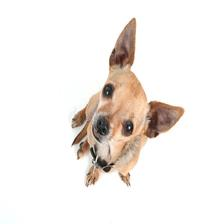

This is a chihuahua!
Probability: 99.9999%


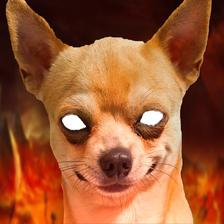

This is a chihuahua!
Probability: 100.0000%


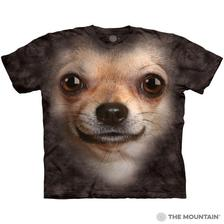

This is a chihuahua!
Probability: 100.0000%


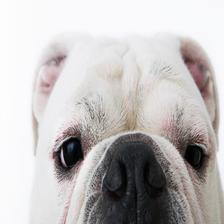

This is a chihuahua!
Probability: 99.9992%


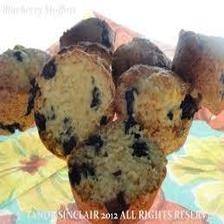

This is a muffin!
Probability: 98.9720%


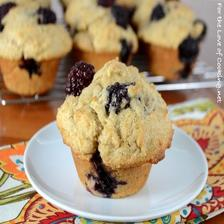

This is a muffin!
Probability: 99.9997%


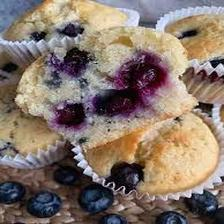

This is a muffin!
Probability: 99.9963%


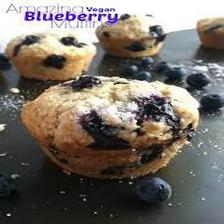

This is a muffin!
Probability: 99.9994%


In [29]:
for example in test_examples:
    muffin_vs_chihuahua.predict(example)

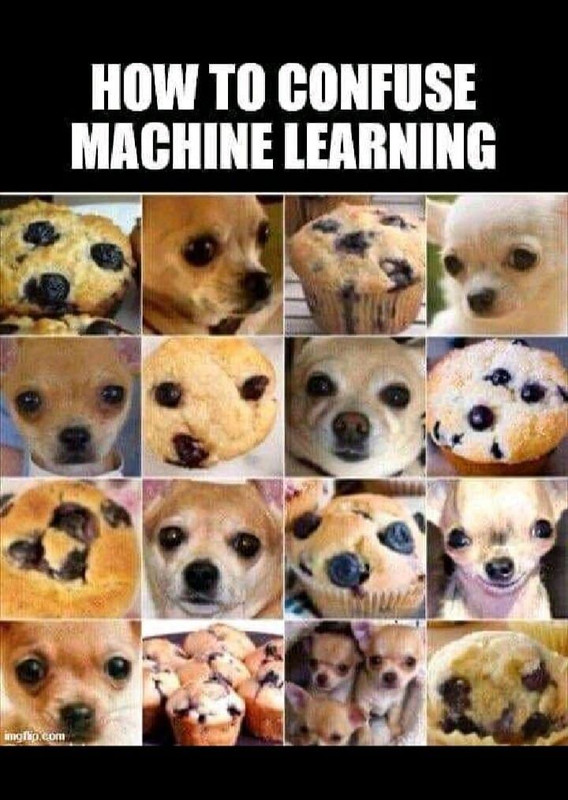

In [31]:
# the original image looks like this
Image(filename=PATH_MEME, width=400)

I cut the individual tiles from the panel and saved them to files, so I can
infer the model on them individually.

In [32]:
HTML(f'''
    <div style="display: flex; flex-direction: column; align-items: center;">
        <div style="display: flex; justify-content: center;">
            <img src="{meme_tiles.tile1_1}" style="width: 25%; margin: 5px"/>
            <img src="{meme_tiles.tile1_2}" style="width: 25%; margin: 5px"/>
            <img src="{meme_tiles.tile1_3}" style="width: 25%; margin: 5px"/>
            <img src="{meme_tiles.tile1_4}" style="width: 25%; margin: 5px"/>
        </div>
        <div style="display: flex; justify-content: center;">
            <img src="{meme_tiles.tile2_1}" style="width: 25%; margin: 5px"/>
            <img src="{meme_tiles.tile2_2}" style="width: 25%; margin: 5px"/>
            <img src="{meme_tiles.tile2_3}" style="width: 25%; margin: 5px"/>
            <img src="{meme_tiles.tile2_4}" style="width: 25%; margin: 5px"/>
        </div>
        <div style="display: flex; justify-content: center;">
            <img src="{meme_tiles.tile3_1}" style="width: 25%; margin: 5px"/>
            <img src="{meme_tiles.tile3_2}" style="width: 25%; margin: 5px"/>
            <img src="{meme_tiles.tile3_3}" style="width: 25%; margin: 5px"/>
            <img src="{meme_tiles.tile3_4}" style="width: 25%; margin: 5px"/>
        </div>
        <div style="display: flex; justify-content: center;">
            <img src="{meme_tiles.tile4_1}" style="width: 25%; margin: 5px"/>
            <img src="{meme_tiles.tile4_2}" style="width: 25%; margin: 5px"/>
            <img src="{meme_tiles.tile4_3}" style="width: 25%; margin: 5px"/>
            <img src="{meme_tiles.tile4_4}" style="width: 25%; margin: 5px"/>
        </div>
    </div>
''')

Testing it one the full panel makes limited sense, because it contains both
chihuahuas and muffins, but the model can only output one class per query.
It would need image segmentation to output all objects, but that is not within
the scope of this project.
Instead, I will just acknowledge that predicting the full panel is not really
meaningful, but do it anyway out of curiosity.

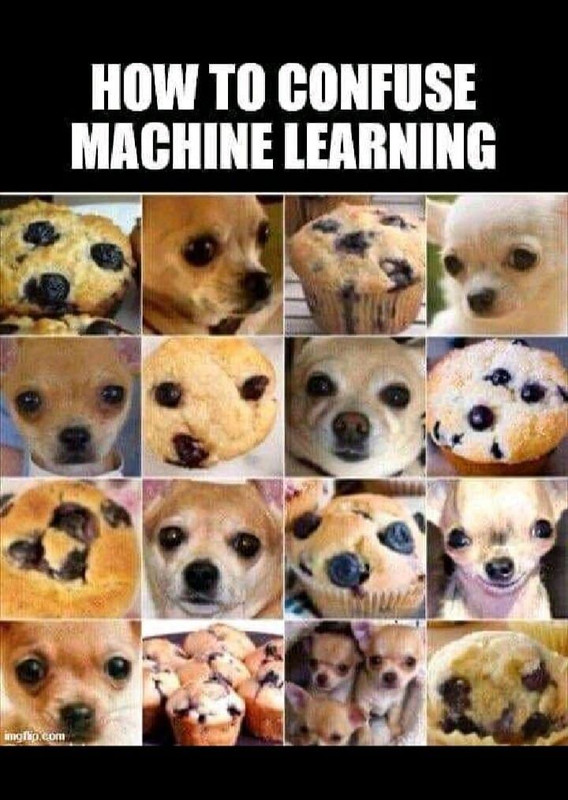

This is a chihuahua!
Probability: 95.3813%


In [33]:
# test the meme
_ = muffin_vs_chihuahua.predict(PATH_MEME)


It's very confident that the image is a chihuahua.
It would be very interesting to apply some methods for interpretability here,
and see which parts of the image the model is paying attention to.

I bet it's the eyes and nose of the chihuahuas.

Now let's predict the tiles individually.

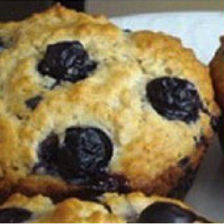

This is a muffin!
Probability: 99.9755%


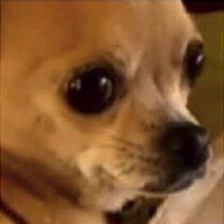

This is a chihuahua!
Probability: 99.9988%


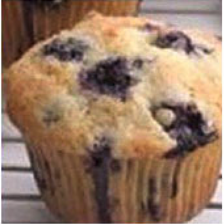

This is a muffin!
Probability: 99.6823%


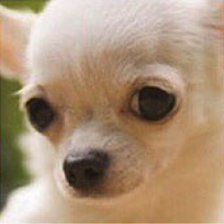

This is a chihuahua!
Probability: 99.9998%


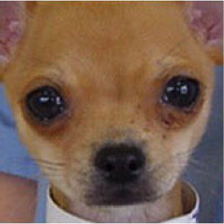

This is a chihuahua!
Probability: 99.9943%


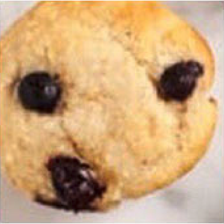

This is a muffin!
Probability: 99.7770%


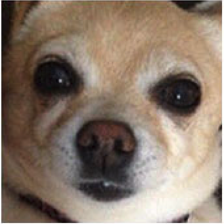

This is a chihuahua!
Probability: 99.9940%


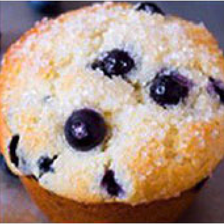

This is a muffin!
Probability: 99.9784%


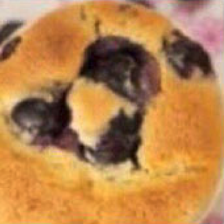

This is a chihuahua!
Probability: 53.9133%


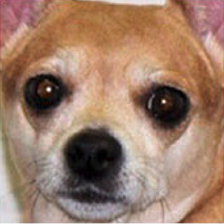

This is a chihuahua!
Probability: 99.9874%


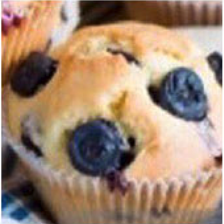

This is a muffin!
Probability: 98.9735%


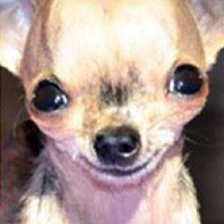

This is a chihuahua!
Probability: 99.9995%


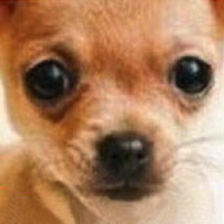

This is a chihuahua!
Probability: 99.9959%


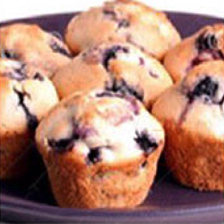

This is a muffin!
Probability: 99.9998%


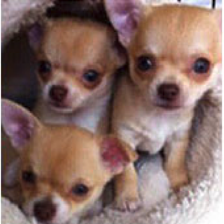

This is a chihuahua!
Probability: 100.0000%


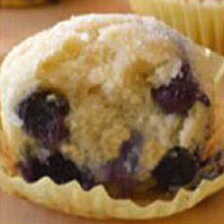

This is a muffin!
Probability: 99.9984%


In [34]:
# predict all tiles
for tile in meme_tiles:
    muffin_vs_chihuahua.predict_user_image(tile)

LOL it really got one wrong :D

Maybe a larger ResNet would be able to get them all right.

Apart from that, all others are correct!

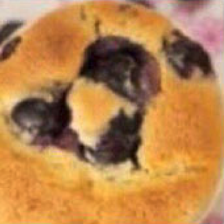

This is a chihuahua!
Probability: 53.9133%


{'class_name': 'negative',
 'probability': 0.5391331911087036,
 'all_probabilities': {'negative': 0.5391331911087036,
  'positive': 0.460866779088974}}

In [35]:
muffin_vs_chihuahua.predict_user_image(meme_tiles.tile3_1)

It failed at this one.

Soooo using a ResNet18 with the applied data set is still not good enough!

Some ideas for improvement:
- use a larger model and more complex model
- use a larger dataset
- try finding images that are more similar to the meme images
- apply data augmentation